In [222]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test_res_seq2seq = pd.DataFrame(json.load(open('seq2seq_results.json'))).T
test_res_attention = pd.DataFrame(json.load(open('attention_results.json'))).T

In [55]:
seq2seq_results = pd.read_csv('seq2seq_results.csv')\
                [['model_id', 'best_reward', 'Tags', 'Name', 'Training reward', 
                                  'num_revisit','Runtime']].set_index('model_id')
attention_results = pd.read_csv('attention_results.csv')\
                [['model_id', 'best_reward', 'Tags', 'Name', 'Training reward', 
                                  'num_revisit','Runtime']].set_index('model_id')
seq2seq_results['model'] = 'seq2seq'
attention_results['model'] = 'attention'
seq2seq_results = seq2seq_results.merge(test_res_seq2seq, left_index=True, right_index=True, how='left')
attention_results = attention_results.merge(test_res_attention, left_index=True, right_index=True, how='left')
seq2seq_results = seq2seq_results.groupby(['Tags', 'num_revisit'])\
    .apply(lambda x: x.sort_values('test_config', ascending=False).iloc[0, :])\
    .drop(['Tags', 'num_revisit'], axis = 1).reset_index().drop(['best_reward','Training reward'], axis = 1)
attention_results = attention_results.groupby(['Tags', 'num_revisit'])\
    .apply(lambda x: x.sort_values('test_config', ascending=False).iloc[0, :])\
    .drop(['Tags', 'num_revisit'], axis = 1).reset_index().drop(['best_reward', 'Training reward'], axis = 1)

data = seq2seq_results.append(attention_results)\
        .rename(columns = {'num_revisit': 'num_trajetories',
                            'Tags': 'training_instance',
                            'Name': 'name',
                          })

In [59]:
data.to_csv('training_resuts.csv', index=None)

In [66]:
reference = data[['name', 'training_instance', 'num_trajetories', 'model']]\
            .set_index('name')

In [266]:
data = data.set_index(['model', 'training_instance', 'num_trajetories'])

In [421]:
curve = pd.read_csv('training_curve.csv').set_index('Step')
curve.columns = curve.columns.str.replace(pat=r' - Training reward',repl='')\
                .str.replace(pat=r'__MIN|__MAX|_x|_y',repl='')

<ipython-input-421-73fc0ff4ea06>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  curve.columns = curve.columns.str.replace(pat=r' - Training reward',repl='')\


In [422]:
trianing_curve = curve.T.drop_duplicates()\
.merge(reference, left_index=True, right_index=True)\
# .set_index(['model', 'num_trajetories', 'training_instance']).sort_index()

In [423]:
random_series = pd.DataFrame(json.load(open('random_training_curve.json'))).T

In [424]:
random_series['training_instance'] = ['training-easy' if i == 'easy_config' else \
                                      'training-hard' for i in random_series.index]
random_series['num_trajetories'] = 1
random_series['model'] = 'random'
random_series.index = pd.Series([f'random_{i}' for i in range(2)], name='Name')

In [425]:
trianing_curve = trianing_curve.append(random_series)\
            .set_index(['model', 'num_trajetories', 'training_instance']).sort_index()

In [426]:
trianing_curve

0         1         2   \
model     num_trajetories training_instance                                 
attention 1               training-easy      0.220915  0.189302  0.921616   
                          training-hard      0.607248  0.830131  0.078745   
          4               training-easy      0.764073  0.837515  0.829810   
                          training-hard      0.326866  0.423909  0.893485   
          12              training-easy      0.775470  0.931515  0.768531   
                          training-hard      0.731430  0.602762  0.574757   
random    1               training-easy      0.607248  0.102727  0.134798   
                          training-hard      0.258778  0.374882  1.115064   
seq2seq   1               training-easy      0.033337  0.921616  0.702261   
                          training-hard      0.078018  0.655678  1.203712   
          4               training-easy      0.597757  0.836618  0.758000   
                          training-hard      0.456260  0.585577  0.698933   
          12              training-easy      0.812335  0.955852  0.782945   
                          training-hard      0.503569  0.532624  0.574321   

                                                   3         4         5   \
model     num_trajetories training_instance                                 
attention 1               training-easy      0.708265  0.886741  1.115349   
                          training-hard      0.754400  0.974856  0.720140   
          4               training-easy      0.840101  0.825287  0.911131   
                          training-hard      0.604881  0.878232  0.874710   
          12              training-easy      0.914562  0.850123  0.842397   
                          training-hard      0.582811  0.718335  0.595495   
random    1               training-easy      0.076720  0.921616  0.118765   
                          training-hard      0.078397  0.443198  0.667716   
seq2seq   1               training-easy      1.607248  1.115064  0.886741   
                          training-hard      1.115064  0.250019  0.335023   
          4               training-easy      0.850541  0.963572  0.510905   
                          training-hard      1.173287  0.893158  0.635165   
          12              training-easy      0.879871  0.941851  0.940603   
                          training-hard      0.559412  0.477531  0.664362   

                                                   6         7         8   \
model     num_trajetories training_instance                                 
attention 1               training-easy      1.101311  0.705846  0.702261   
                          training-hard      0.705846  1.105722  0.653734   
          4               training-easy      0.879229  0.658718  1.063335   
                          training-hard      0.675526  0.834520  1.078024   
          12              training-easy      0.887864  0.800538  0.858517   
                          training-hard      0.733735  0.605828  0.639426   
random    1               training-easy      0.140633  0.152355  0.115349   
                          training-hard      0.067954  0.503243  0.117911   
seq2seq   1               training-easy      0.708265  0.705846  1.101311   
                          training-hard      0.735649  1.767083  0.888367   
          4               training-easy      0.960063  0.796899  0.759351   
                          training-hard      1.052522  0.712022  1.030783   
          12              training-easy      0.783506  0.891395  0.849897   
                          training-hard      0.443272  0.349283  0.504718   

                                                   9         10        11  \
model     num_trajetories training_instance                                 
attention 1               training-easy      0.615175  0.921616  0.708265   
                          training-hard      0.477133  0.789818  1.115064   
          4               training-easy     

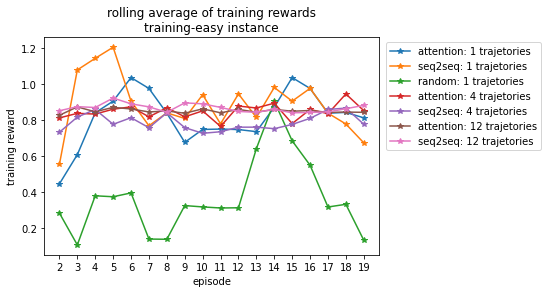

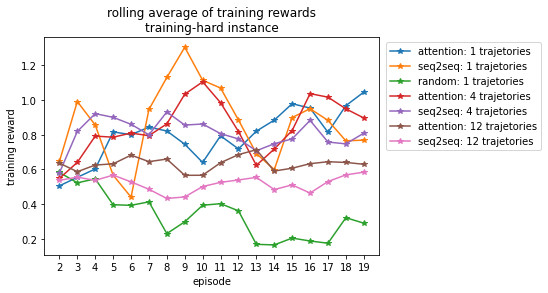

<Figure size 432x288 with 0 Axes>

In [429]:
for training_instance in ['training-easy', 'training-hard']:
    for num_trajetories in [1, 4, 12]:
        for model in ['attention', 'seq2seq', 'random']:
            if model == 'random' and num_trajetories in [4, 12]:
                continue
            ax = trianing_curve.loc[model]\
            .loc[num_trajetories]\
            .loc[training_instance]\
            .rolling(3)\
            .mean()\
            .rename(model+': '+str(num_trajetories)+' trajetories')\
            .plot(marker='*', xticks=range(2, 20))
            plt.legend(bbox_to_anchor=(1.5, 1),loc = 'upper right')
    plt.title(f'rolling average of training rewards\n{training_instance} instance')
    plt.xlabel('episode')
    plt.ylabel('training reward')
    plt.show()
    plt.savefig(f'{training_instance}.png')

In [430]:
best_training = trianing_curve.apply(lambda x: x.max(), axis=1).to_frame()
best_training.columns = ['best_training_rewards']

In [431]:
best_training

best_training_rewards
model     num_trajetories training_instance                       
attention 1               training-easy                   1.115349
                          training-hard                   1.305517
          4               training-easy                   1.066773
                          training-hard                   1.188934
          12              training-easy                   0.931515
                          training-hard                   0.856213
random    1               training-easy                   1.115064
                          training-hard                   1.115064
seq2seq   1               training-easy                   1.607248
                          training-hard                   1.767083
          4               training-easy                   0.963572
                          training-hard                   1.173287
          12              training-easy                   0.955852
                          training-hard                   0.707421

In [284]:
random_idx = pd.MultiIndex.from_tuples(
    [('random', 'N/A', 1)],
    names=['model', 'training_instance', 'num_trajetories']
)
random_data = pd.DataFrame(json.load(open('random_results.json')), index=random_idx)

In [290]:
data = data.append(random_data)

In [312]:
test_data = data[['easy_config', 'hard_config', 'test_config']]

In [314]:
test_data.easy_config = test_data.apply(lambda x: x.easy_config if x.name[1]!='training-easy' \
                                        else np.NaN,axis =1)
test_data.hard_config = test_data.apply(lambda x: x.hard_config if x.name[1]!='training-hard' \
                                        else np.NaN,axis =1)

/Users/syeehyn/opt/anaconda3/envs/scipy-ml/lib/python3.8/site-packages/pandas/core/generic.py:5489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [331]:
display(test_data)

easy_config  hard_config  \
model     training_instance num_trajetories                             
seq2seq   training-easy     1                        NaN     0.624571   
                            4                        NaN     0.653427   
                            12                       NaN     1.017011   
          training-hard     1                   0.698237          NaN   
                            4                   0.677572          NaN   
                            12                  0.807179          NaN   
attention training-easy     1                        NaN     0.516764   
                            4                        NaN     0.702680   
                            12                       NaN     0.719894   
          training-hard     1                   0.728543          NaN   
                            4                   0.489844          NaN   
                            12                  0.787593          NaN   
random    N/A               1                   0.371029     0.348695   

                                             test_config  
model     training_instance num_trajetories               
seq2seq   training-easy     1                   0.495289  
                            4                   0.847902  
                            12                  0.592489  
          training-hard     1                   0.654271  
                            4                   0.709378  
                            12                  0.685687  
attention training-easy     1                   0.776047  
                            4                   0.623918  
                            12                  0.761169  
          training-hard     1                   0.753973  
                            4                   0.469277  
                            12                  0.797781  
random    N/A               1                   0.364410

In [434]:
df = pd.read_csv('training_resuts.csv')
df['runtime'] = df.Runtime /60

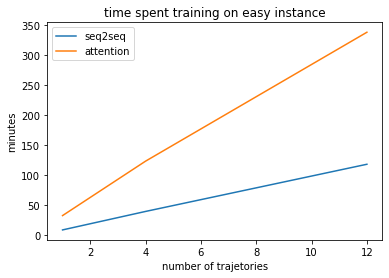

In [473]:
for model in ['seq2seq', 'attention']:
    sub_df = df[(df.model==model) & (df.training_instance == 'training-easy')][['num_trajetories', 'runtime']]
    plt.plot(sub_df.num_trajetories, sub_df.runtime, label=model)
plt.title('time spent training on easy instance')
plt.ylabel('minutes')
plt.xlabel('number of trajetories')
plt.legend()
plt.show()

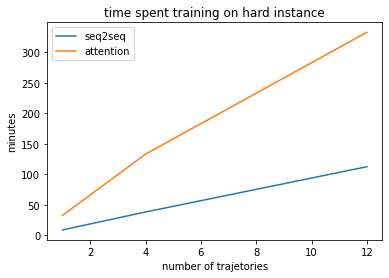

In [474]:
for model in ['seq2seq', 'attention']:
    sub_df = df[(df.model==model) & (df.training_instance == 'training-hard')][['num_trajetories', 'runtime']]
    plt.plot(sub_df.num_trajetories, sub_df.runtime, label=model)
plt.title('time spent training on hard instance')
plt.ylabel('minutes')
plt.xlabel('number of trajetories')
plt.legend()
plt.show()